In [16]:
from pandas import read_csv
from numpy import dstack
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.layers import TimeDistributed,MaxPooling1D,Conv1D,Flatten,Dropout,ConvLSTM2D,SimpleRNN,GRU
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

In [17]:
%store -r X_train
%store -r X_val
%store -r X_test
%store -r y_train
%store -r y_val
%store -r y_test

In [18]:
trainX=X_train
trainy=y_train
valX=X_val
valy=y_val
testX=X_test
testy=y_test

In [19]:
trainX.shape

(47, 100, 17)

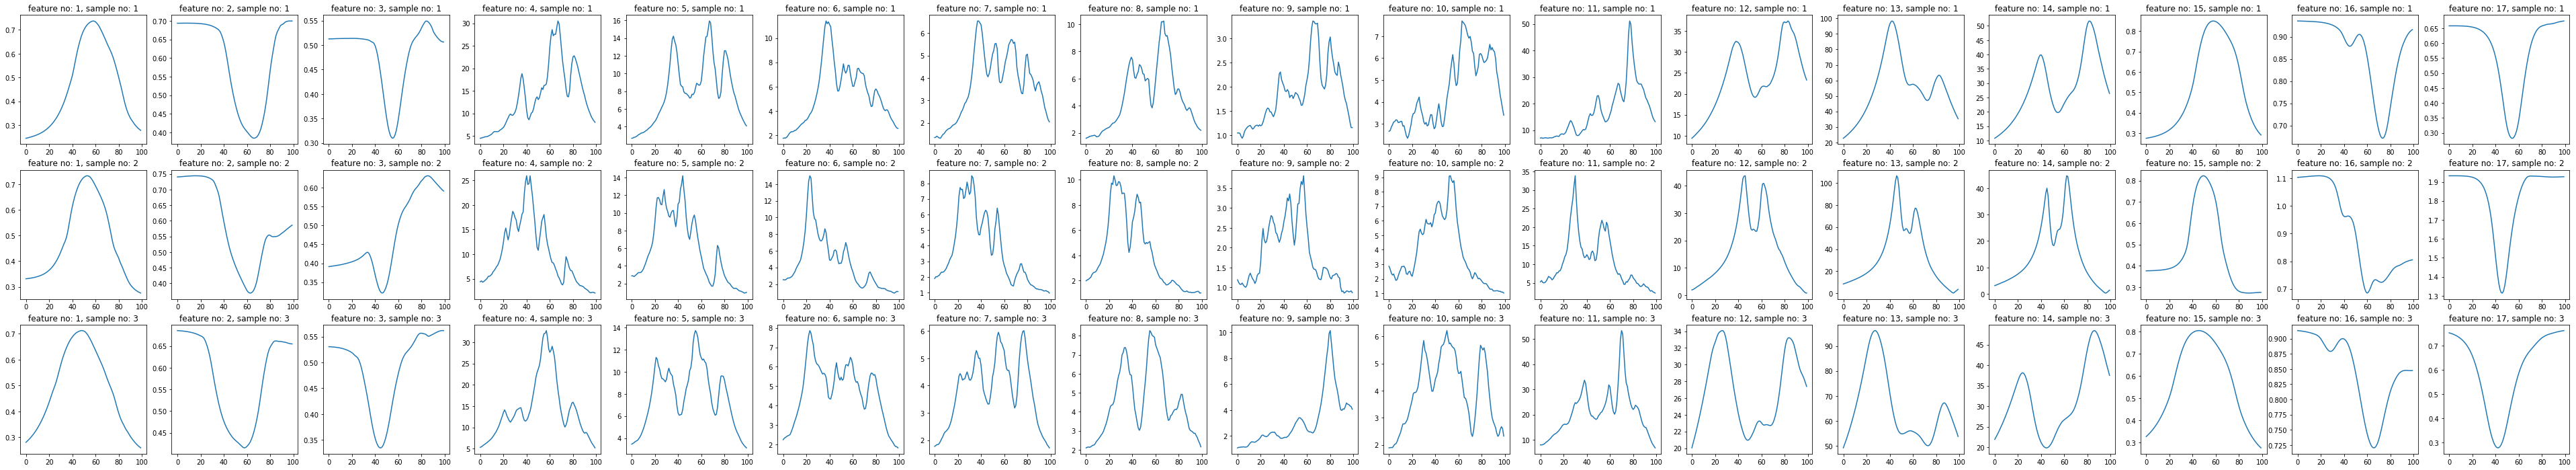

In [20]:
features=17
samples=3
movement_num=1

trainX_movement=np.array([trainX[i] for i in range(len(trainX)) if trainy[i][movement_num]==1])

m=features
n=samples
fig=plt.figure(figsize=(4*m,4*n))
k=0
for i in range(1,n+1):
    for j in range(1,m+1):
        k=k+1
        fig.add_subplot(n,m,k)
        plt.plot(trainX_movement[i-1,:,j-1])
        plt.title('feature no: %d, sample no: %d'%(j,i))
plt.show()

In [5]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

In [14]:
# fit and evaluate a model
def evaluate_model(trainX, trainy,valX,valy, testX, testy):
	verbose, epochs, batch_size = 1, 50, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(GRU(100, input_shape=(n_timesteps,n_features),return_sequences=True))
	model.add(Dropout(0.5))
	model.add(GRU(100, input_shape=(n_timesteps,n_features)))
	model.add(Dropout(0.8))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	history=model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose,validation_data=(valX,valy))
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return history,accuracy



In [15]:
history,accuracy=evaluate_model(trainX, trainy, valX, valy,testX,testy)

Train on 47 samples, validate on 10 samples
Epoch 1/50
47/47 [==============================] - 5s 108ms/sample - loss: 1.8434 - acc: 0.1277 - val_loss: 1.6199 - val_acc: 0.2000
Epoch 2/50
47/47 [==============================] - 1s 26ms/sample - loss: 1.8100 - acc: 0.1702 - val_loss: 1.6588 - val_acc: 0.1000
Epoch 3/50
47/47 [==============================] - 1s 25ms/sample - loss: 1.8792 - acc: 0.2128 - val_loss: 1.6971 - val_acc: 0.1000
Epoch 4/50
47/47 [==============================] - 1s 25ms/sample - loss: 1.6272 - acc: 0.3830 - val_loss: 1.7239 - val_acc: 0.1000
Epoch 5/50
47/47 [==============================] - 1s 25ms/sample - loss: 1.7358 - acc: 0.2766 - val_loss: 1.7372 - val_acc: 0.1000
Epoch 6/50
47/47 [==============================] - 1s 25ms/sample - loss: 1.7777 - acc: 0.2979 - val_loss: 1.7423 - val_acc: 0.1000
Epoch 7/50
47/47 [==============================] - 1s 25ms/sample - loss: 1.6821 - acc: 0.2340 - val_loss: 1.7414 - val_acc: 0.1000
Epoch 8/50
47/47 [======

In [13]:
accuracy

0.90909094

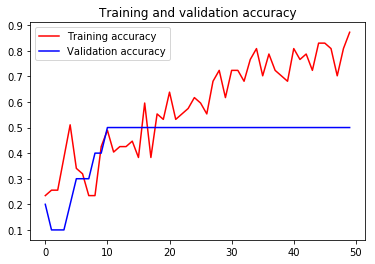

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig=plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
#fig.savefig('E:/ML_projects/Human_activities_identifying/figs/2.png')


plt.show()